In [2]:
from sklearn.datasets import load_digits
import pandas as pd

digits=load_digits()

In [3]:
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [10]:
data = pd.DataFrame(digits['data'])
labels = pd.Series(digits['target'])

print(data[:5])
print('\n')
print(labels[:5])

    0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]


0    0
1    1
2    2
3    3
4    4
dtype: int64


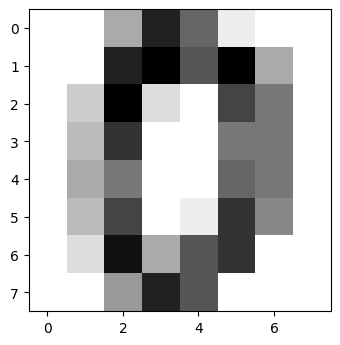

In [24]:
# Generate a scatter plot grid, with 2 rows and 4 columns.
# In the first row:
# Display the images corresponding to rows 0, 100, 200, and 300.
# In the second row:
# Display the images corresponding to rows 1000, 1100, 1200, and 1300. 

import matplotlib.pyplot as plt
%matplotlib inline

first_image = data.iloc[0]
np_image = first_image.values.reshape(8,8)
plt.imshow(np_image, cmap='gray_r')
plt.show()

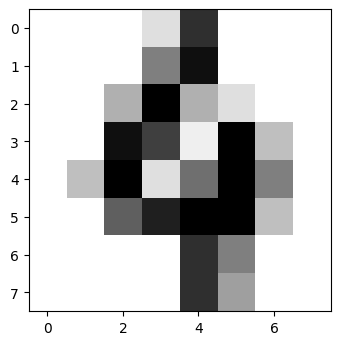

In [25]:
second_image = data.iloc[100]
np_image = second_image.values.reshape(8,8)
plt.imshow(np_image, cmap='gray_r')
plt.show()

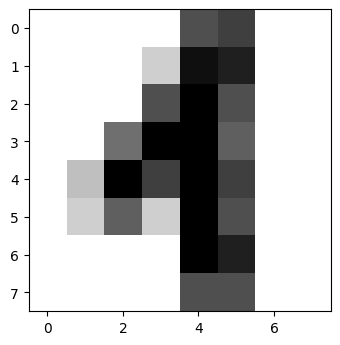

In [26]:
third_image = data.iloc[200]
np_image = third_image.values.reshape(8,8)
plt.imshow(np_image, cmap='gray_r')
plt.show()

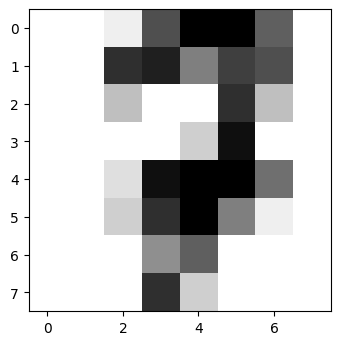

In [27]:
fourth_image = data.iloc[300]
np_image = fourth_image.values.reshape(8,8)
plt.imshow(np_image, cmap='gray_r')
plt.show()

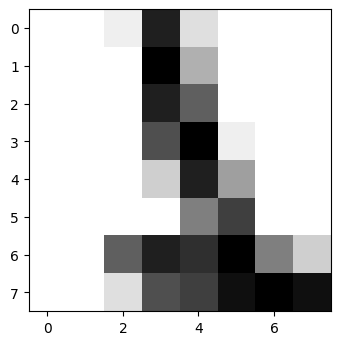

In [28]:
fifth_image = data.iloc[1000]
np_image = fifth_image.values.reshape(8,8)
plt.imshow(np_image, cmap='gray_r')
plt.show()

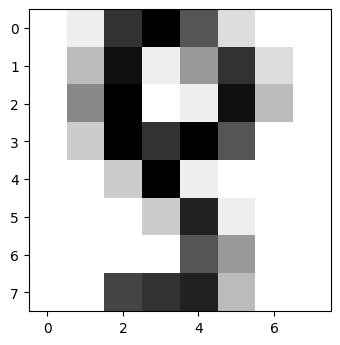

In [29]:
sixth_image = data.iloc[1100]
np_image = sixth_image.values.reshape(8,8)
plt.imshow(np_image, cmap='gray_r')
plt.show()

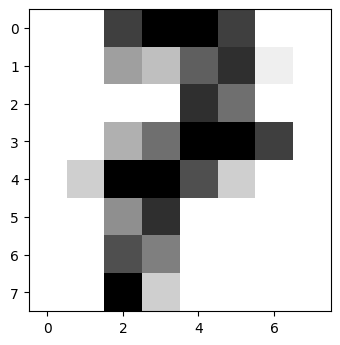

In [30]:
seventh_image = data.iloc[1200]
np_image = seventh_image.values.reshape(8,8)
plt.imshow(np_image, cmap='gray_r')
plt.show()

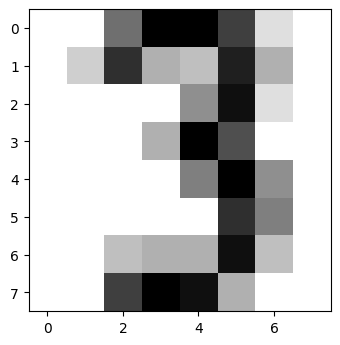

In [31]:
eight_image = data.iloc[1300]
np_image = eight_image.values.reshape(8,8)
plt.imshow(np_image, cmap='gray_r')
plt.show()

KNN algorithm

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

X_train, X_test = train_test_split(data, test_size=0.3, random_state=1)
Y_train, Y_test = train_test_split(labels, test_size=0.3, random_state=1)

In [48]:
def train(train_X, train_Y, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X, train_Y)
    return knn
    
def test(knn, test_X, test_Y):
    predictions = knn.predict(test_X)
    score = accuracy_score(test_Y, predictions)
    return score

def cross_validate(k, n_splits=4):
    accuracy_list = []
    kf = KFold(n_splits, shuffle=True, random_state=1)
    for train_index, test_index in kf.split(data):
        train_X = data.loc[train_index]
        test_X = data.loc[test_index]
        train_Y = labels.loc[train_index]
        test_Y = labels.loc[test_index]
    
    model = train(train_X, train_Y, k)
    score = test(model, test_X, test_Y)
    accuracy_list.append(score)
    return np.mean(accuracy_list)

In [52]:
k_list = [2,3,4,5,6,7,8,9,10]
accuracy_list = [] 

for k in k_list:
    accuracy = cross_validate(k)
    accuracy_list.append(accuracy)
    
print(accuracy_list)

[0.9755011135857461, 0.9844097995545658, 0.9821826280623608, 0.9821826280623608, 0.9755011135857461, 0.9799554565701559, 0.9799554565701559, 0.9755011135857461, 0.9755011135857461]


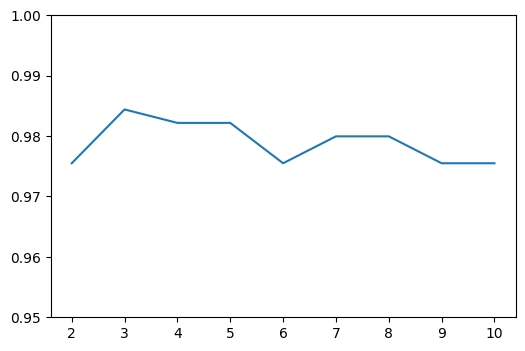

In [61]:
plt.plot(k_list, accuracy_list)
plt.ylim([0.95,1])
plt.show()

In [70]:
from sklearn.neural_network import MLPClassifier

acc_score_list = []
neurons = [8, 16, 32, 64, 128, 256]
acc_neurons = []

for n in neurons:
    kf = KFold(4, shuffle=True, random_state=1)
    for train_index, test_index in kf.split(data):
        train_X = data.loc[train_index]
        test_X = data.loc[test_index]
        train_Y = labels.loc[train_index]
        test_Y = labels.loc[test_index]
    
        mlp = MLPClassifier(hidden_layer_sizes=(n,), activation='logistic',max_iter=100)
        mlp.fit(train_X, train_Y)
        predictions = mlp.predict(test_X)
        acc_score = accuracy_score(test_Y, predictions)
        acc_score_list.append(acc_score)
        acc_score_mean = np.mean(accuracy_list)
    acc_neurons.append(acc_score_mean)
           
print(acc_neurons)

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural

[0.9789656025736204, 0.9789656025736204, 0.9789656025736204, 0.9789656025736204, 0.9789656025736204, 0.9789656025736204]


/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.



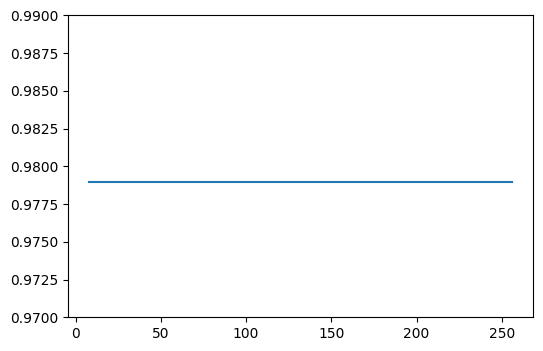

In [71]:
plt.plot(neurons, acc_neurons)
plt.ylim([0.97,0.99])
plt.show()

Convergence could not be reached after 100 iterations.

In [73]:
acc_score_list = []

kf = KFold(4, shuffle=True, random_state=1)
for train_index, test_index in kf.split(data):
    train_X = data.loc[train_index]
    test_X = data.loc[test_index]
    train_Y = labels.loc[train_index]
    test_Y = labels.loc[test_index]
    
    mlp = MLPClassifier(hidden_layer_sizes=(64,64), activation='logistic',max_iter=200)
    mlp.fit(train_X, train_Y)
    predictions = mlp.predict(test_X)
    acc_score = accuracy_score(test_Y, predictions)
    acc_score_list.append(acc_score)
    acc_score_mean = np.mean(accuracy_list)
           
print(acc_score_mean)

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



0.9789656025736204


/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Again, convergence could not be reached after 200 iterations.

In [76]:
acc_score_list = []

kf = KFold(6, shuffle=True, random_state=1)
for train_index, test_index in kf.split(data):
    train_X = data.loc[train_index]
    test_X = data.loc[test_index]
    train_Y = labels.loc[train_index]
    test_Y = labels.loc[test_index]
    
    mlp = MLPClassifier(hidden_layer_sizes=(10,10, 10), activation='logistic',max_iter=3000)
    mlp.fit(train_X, train_Y)
    predictions = mlp.predict(test_X)
    acc_score = accuracy_score(test_Y, predictions)
    acc_score_list.append(acc_score)
    acc_score_mean = np.mean(accuracy_list)
           
print(acc_score_mean)

0.9789656025736204
